In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df.test_result.value_counts()

#number of people who passed and failed the test

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

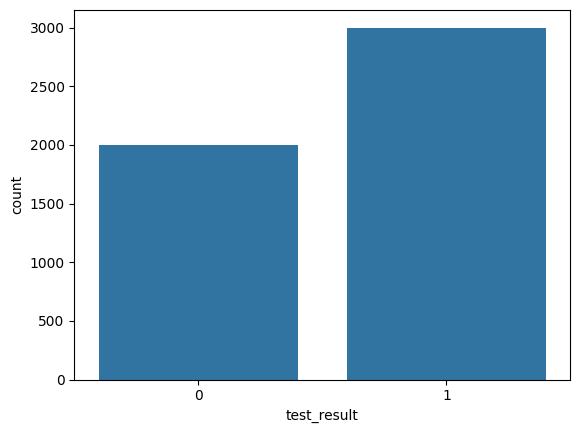

In [8]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

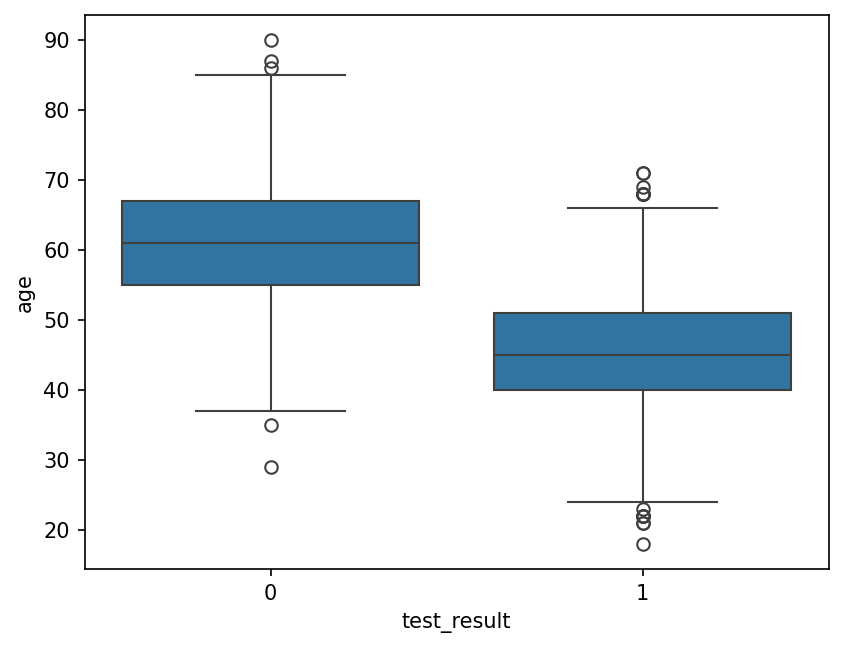

In [9]:
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='age',data=df)

#the age of people who passed and failed the test

#relationship between age and test result

#the graph shows that the average age of people who passed the test is younger
# than the average age of people who failed the test

<Axes: xlabel='test_result', ylabel='physical_score'>

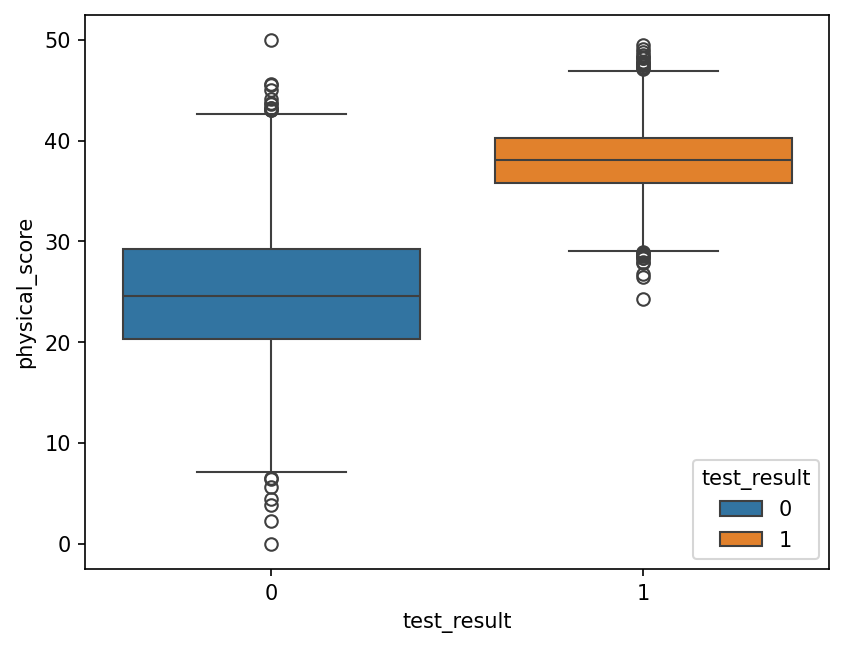

In [10]:
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='physical_score',data=df,hue='test_result')

#the physical score of people who passed and failed the test

#relationship between physical score and test result

#the graph shows that the average physical score of people who passed the test is
# higher 

#those who did not pass the test have greater distribution of physical scores

<Axes: xlabel='age', ylabel='physical_score'>

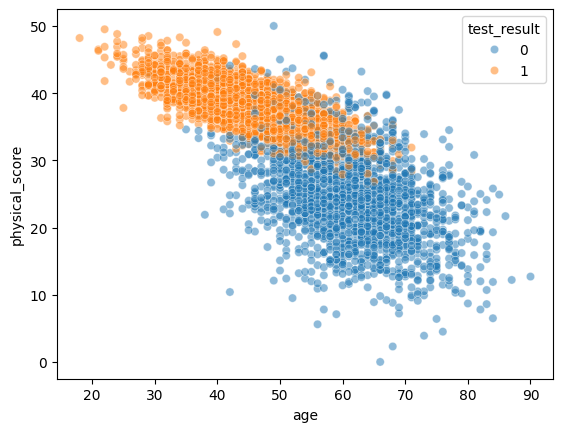

In [11]:
sns.scatterplot(x='age',y='physical_score',data=df, hue='test_result', alpha=0.5)

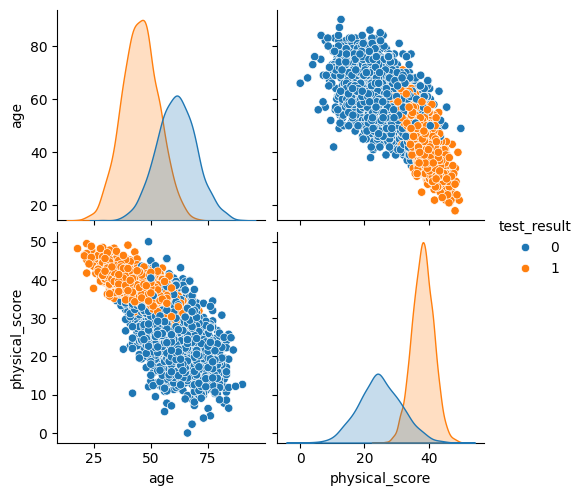

In [12]:
sns.pairplot(df, hue='test_result')

<Axes: >

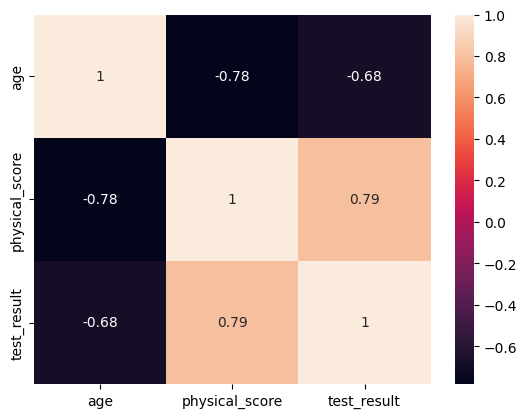

In [13]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

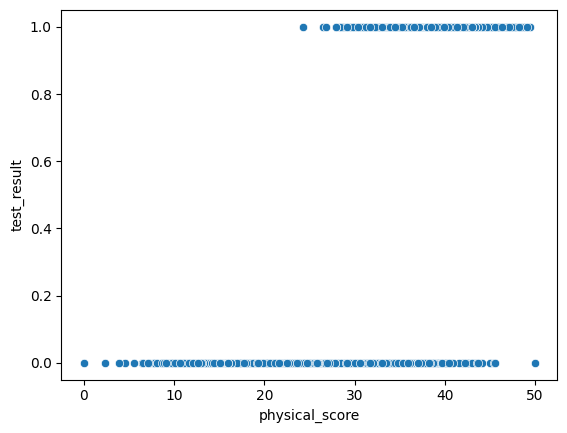

In [14]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

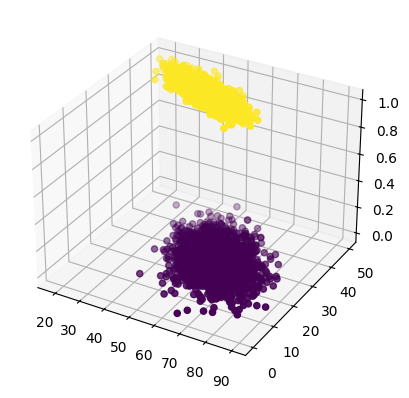

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [16]:
X = df.drop('test_result',axis=1)

In [17]:
y = df['test_result']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

#when using Logistic Regression, data scaling allows us to compare the coefficients of different
# features to each other

scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [20]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [22]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(
 |      penalty='l2',
 |      *,
 |      dual=False,
 |      tol=0.0001,
 |      C=1.0,
 |      fit_intercept=True,
 |      intercept_scaling=1,
 |      class_weight=None,
 |      random_state=None,
 |      solver='lbfgs',
 |      max_iter=100,
 |      multi_class='deprecated',
 |      verbose=0,
 |      warm_start=False,
 |      n_jobs=None,
 |      l1_ratio=None
 |  )
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for opti

In [23]:
model.fit(scaled_X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
model.coef_

#for age, the coefficient is -0.95017725
#this means that for each one unit increase in age, the 
# log odds of passing the test decrease by 0.95017725

#for physical score, the coefficient is 3.46148946
#this means that for each one unit increase in physical score, the 
# log odds of passing the test increase by 3.46148946

#in total, physical score has a greater impact on the log odds of passing the test

array([[-0.95017725,  3.46148946]])

In [25]:
y_pred = model.predict(scaled_X_test)

In [26]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [27]:
y_pred_proba = model.predict_proba(scaled_X_test)

In [28]:
y_pred_proba
#proba - probability

#2 columns - probability of 0 and probability of 1

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [33]:
accuracy_score(y_test, y_pred)

0.93

In [40]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

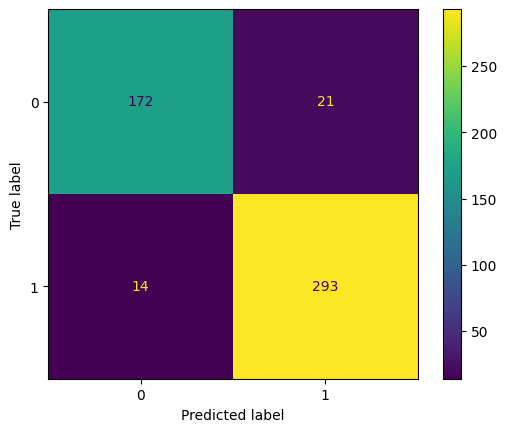

In [49]:
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)

In [50]:
len(y_test)

500

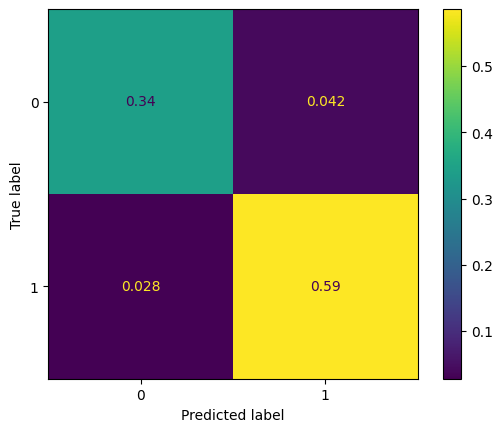

In [47]:
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test, normalize='all')

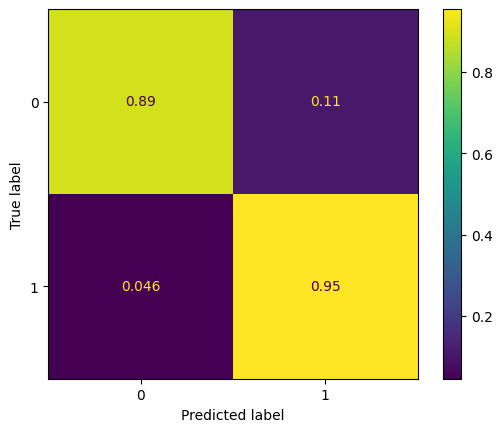

In [48]:
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test, normalize='true')

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [34]:
from sklearn.metrics import recall_score, precision_score, f1_score

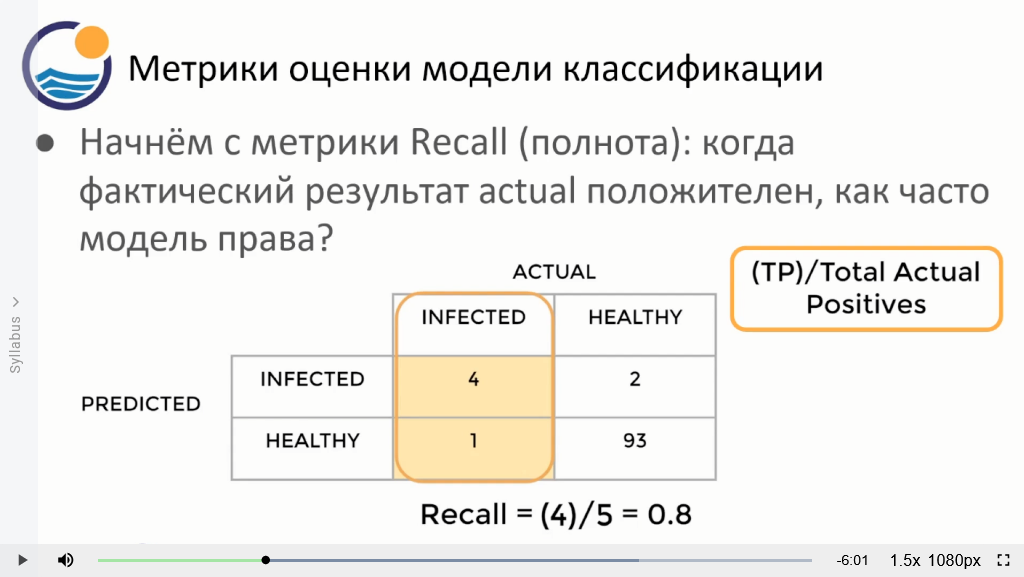

In [ ]:
recall_score(y_test, y_pred)

#the ratio of the number of true positives to the total number of actual positives 

#if recall is zero, it means that we have no true positives
#if recall is 1, it means that we have all the true positives

#Recall(полнота)

#Recall = TP/(TP+FN) = 4/(4+1)=0.8

#Доля объектов положительного класса из всех объектов положительного класса, которую  нашел алгоритм.

0.9543973941368078

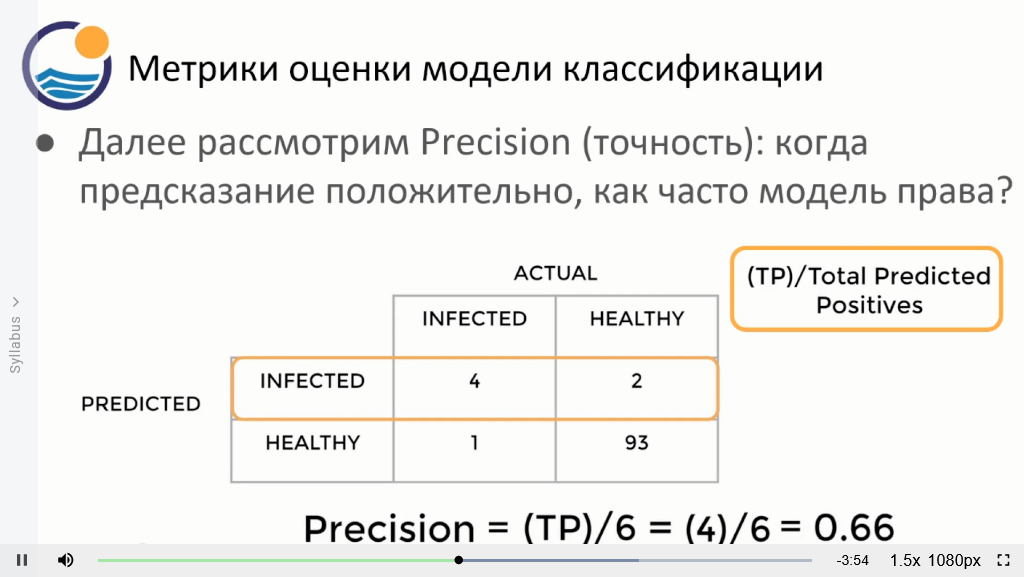

In [ ]:
precision_score(y_test, y_pred)

#the ratio of the number of true positives to the total number of predicted positives

#Precision(точность) 

#Precision = TP/(TP+FP) = 4/(4+2)=0,67

#Доля объектов,  названных классификатором положительными и при этом действительно являющимися положительными.

0.9331210191082803

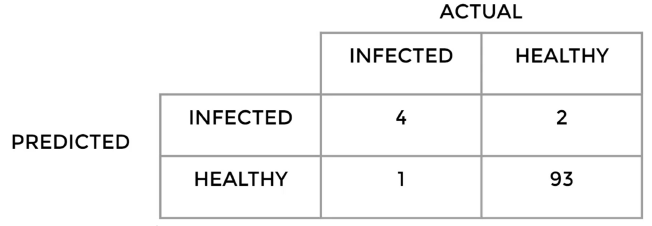
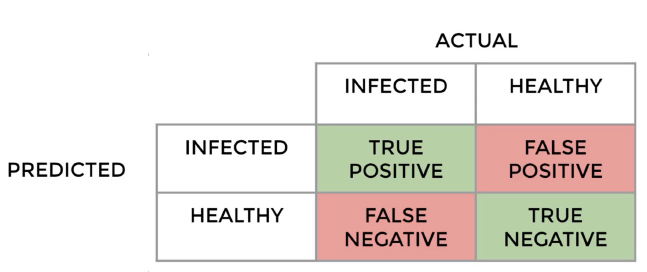

In [ ]:
f1_score(y_test, y_pred)

#

0.9436392914653784

In [53]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

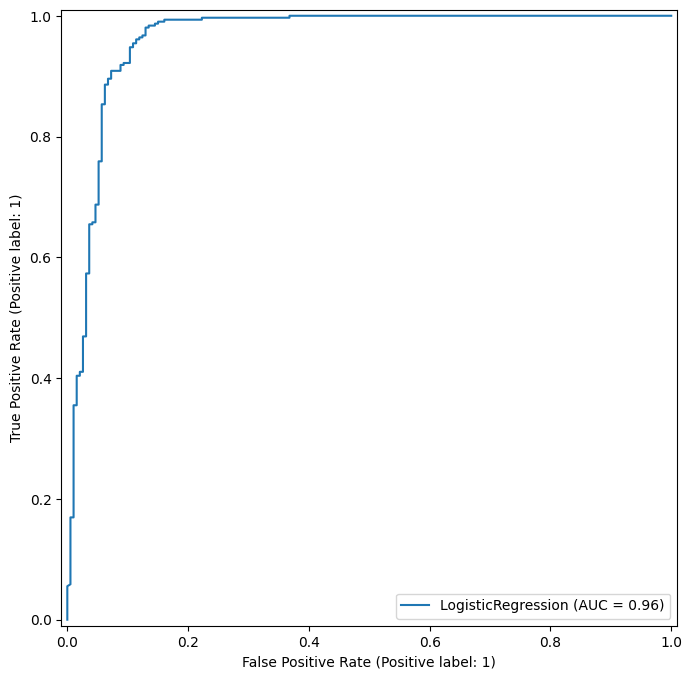

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
RocCurveDisplay.from_estimator(model, scaled_X_test, y_test, ax=ax)

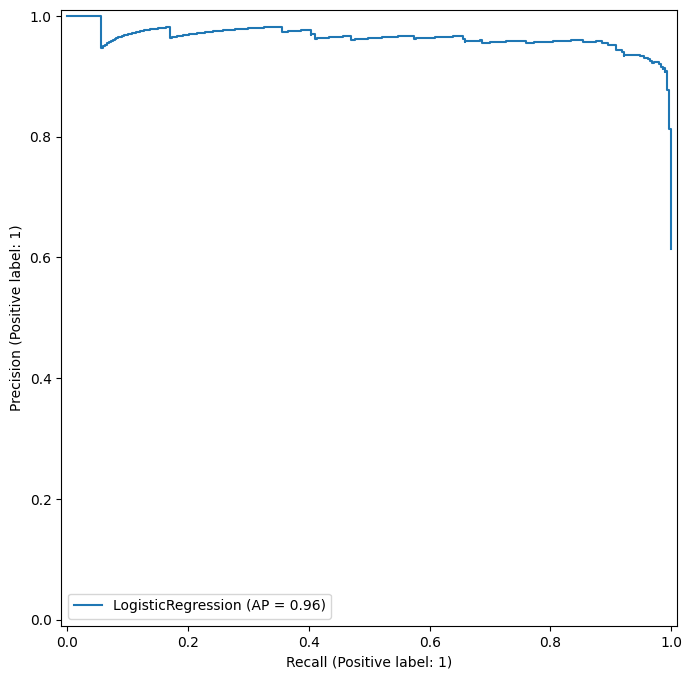

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
PrecisionRecallDisplay.from_estimator(model, scaled_X_test, y_test, ax=ax)

In [63]:
model.predict_proba(scaled_X_test)[:5]

array([[0.02380517, 0.97619483],
       [0.02688541, 0.97311459],
       [0.98922003, 0.01077997],
       [0.00190239, 0.99809761],
       [0.97506574, 0.02493426]])

In [61]:
y_test.head()

1718    1
2511    1
345     0
2521    1
54      0
Name: test_result, dtype: int64